In [43]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

<br>

# Eyepacs Distribution

In [2]:
df = pd.read_csv('../datasets/reduced_eyepacs_resized_cropped/metadata.csv')

In [3]:
df.head()

,patient_id,side,image,level,level_group,groups,split
0,10,left,0/10_left.jpeg,0,nref,left_nref,val
1,10,right,0/10_right.jpeg,0,nref,right_nref,test
2,13,left,0/13_left.jpeg,0,nref,left_nref,train
3,13,right,0/13_right.jpeg,0,nref,right_nref,test
4,15,left,1/15_left.jpeg,1,nref,left_nref,test


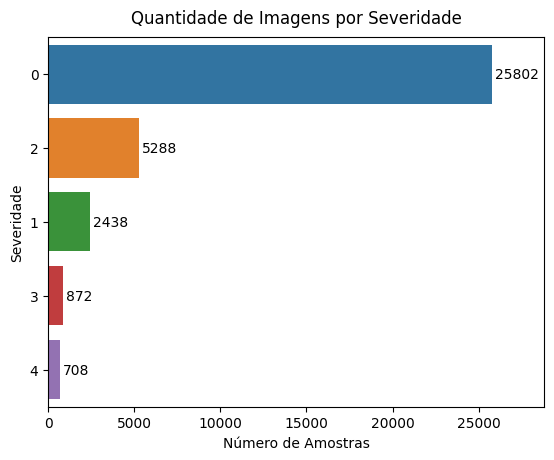

In [170]:
#fig, axes = plt.subplots(nrows=1, ncols=2)
fig = plt.figure()
countplot = sns.countplot(y=df['level'], order=label_count.index)
countplot.bar_label(countplot.containers[0], padding=2)
plt.title('Quantidade de Imagens por Severidade', pad=10)
plt.xlabel('Número de Amostras')
plt.xlim(0, label_count.iloc[0] + 3e3)
plt.ylabel('Severidade')
plt.show()

In [176]:
fig.savefig('./images/class_count_reduced_eyepacs.png', format='png')

<br>

# EyePacs Severity Samples

In [148]:
# Getting patient ID samples sorted by severity (ascending order)
random_severity_samples = df.groupby('level').sample(random_state=55)
patient_ids = random_severity_samples['patient_id'].values
dataset_base_path = '../datasets/reduced_eyepacs_resized_cropped'

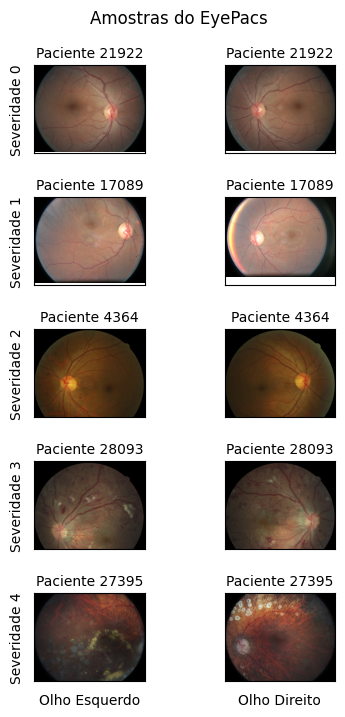

In [164]:
fig_eye_samples, axes = plt.subplots(nrows=5, ncols=2, figsize=(4.5,8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.5)
fig_eye_samples.suptitle('Amostras do EyePacs', y=0.95)
for i, patient_id in enumerate(patient_ids):
    patient_metadata = df.loc[df['patient_id'] == patient_id]
    if patient_metadata.level.nunique() > 1:
        print(f'Patient with id: {patient_id} have different severities. Try another random seed')
        break
    # Left Eye
    left_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'left']
    left_eye_image_path = os.path.join(dataset_base_path, left_eye_metadata['image'].item())
    left_eye_image = Image.open(left_eye_image_path)
    axes[i, 0].imshow(left_eye_image)
    axes[i, 0].set_title(f'Paciente {patient_id}', fontsize=10)
    axes[i, 0].set_ylabel(f'Severidade {i}')
    axes[i, 0].set_yticklabels([])
    axes[i, 0].set_yticks([])
    
    # Right Eye
    right_eye_metadata = patient_metadata.loc[patient_metadata['side'] == 'right']
    right_eye_image_path = os.path.join(dataset_base_path, right_eye_metadata['image'].item())
    right_eye_image = Image.open(right_eye_image_path)
    axes[i, 1].imshow(right_eye_image)
    axes[i, 1].set_title(f'Paciente {patient_id}', fontsize=10)
    # Common
    if i == (len(patient_ids) - 1):
        axes[i, 0].set_xticks([])
        axes[i, 0].set_xticklabels([])
        axes[i, 0].set_xlabel('Olho Esquerdo', labelpad=5)
        
        axes[i, 1].set_xticks([])
        axes[i, 1].set_xticklabels([])
        axes[i, 1].set_xlabel('Olho Direito', labelpad=5)

plt.show()    

In [167]:
fig_eye_samples.savefig('./images/severity_individual_samples.pdf', format='pdf', bbox_inches='tight')

In [172]:
df = pd.read_csv('../datasets/reduced_eyepacs_resized_cropped/metadata_imbalanced.csv')